# Úloha číslo 3. - Implementace a úprava modelu Zombie Apokalypsy


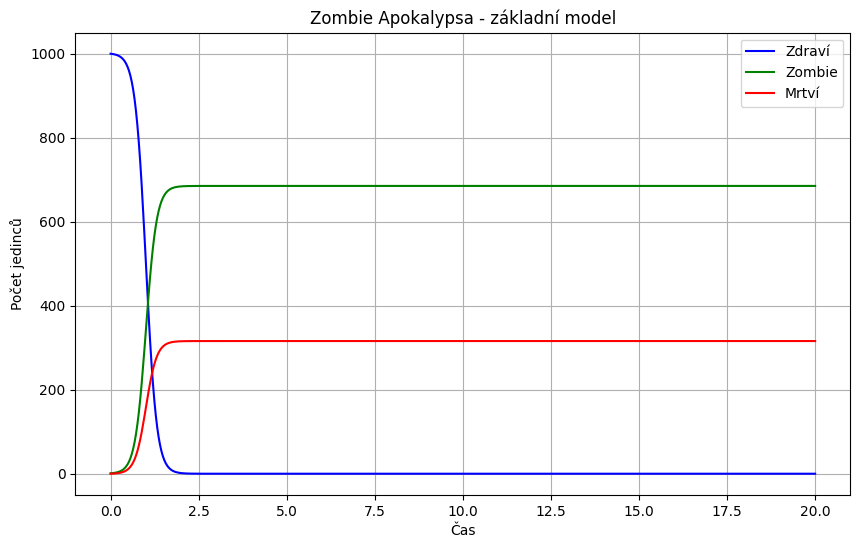

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def zobmbie_model(y, t, beta, delta, alpha):
    S, Z, R = y
    dSdt = -beta * S * Z
    dZdt = beta * S * Z - delta * S * Z
    dRdt = delta * S * Z + alpha * S
    return [dSdt, dZdt, dRdt]


def solution_graph(title):
    # Výpočet ODE
    solution = odeint(zobmbie_model, y0, t, args=(beta, delta, alpha))
    S, Z, R = solution.T

    # Graf
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, label="Zdraví", color="blue")
    plt.plot(t, Z, label="Zombie", color="green")
    plt.plot(t, R, label="Mrtví", color="red")
    plt.xlabel("Čas")
    plt.ylabel("Počet jedinců")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


# Parametry
beta = 0.0095  # míra kousnutí
delta = 0.003  # míra zabití zombíka
alpha = 0.0001  # míra přirozené smrti

# Počáteční podmínky
S0 = 1000  # zdraví
Z0 = 1  # zombie
R0 = 0  # mrtví
y0 = [S0, Z0, R0]

# Časová osa
t = np.linspace(0, 20, 500)

solution_graph(title="Zombie Apokalypsa - základní model")


## <b>Výzkumná otázka 1:</b> Jak ovlivňuje infekčnost (β) vývoj populace?


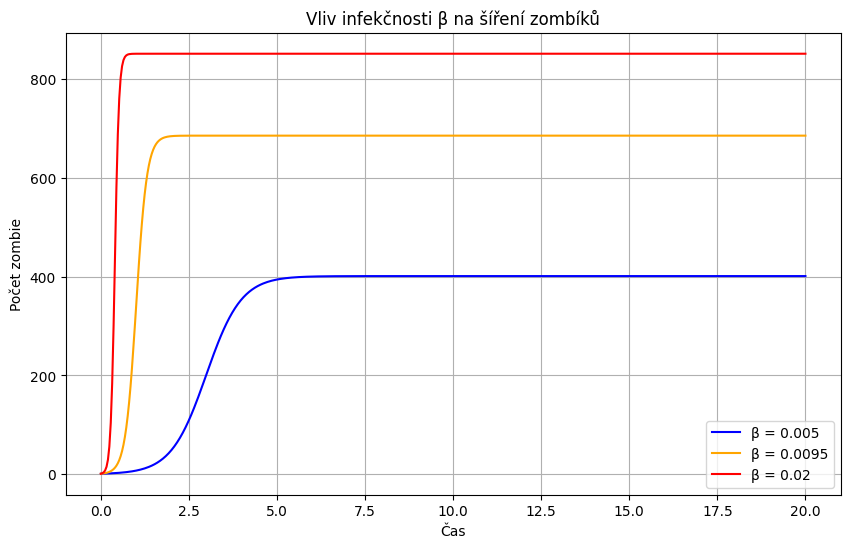

In [7]:
betas = [0.005, 0.0095, 0.02]
colors = ["blue", "orange", "red"]

plt.figure(figsize=(10, 6))
for b, c in zip(betas, colors):
    solution = odeint(zobmbie_model, y0, t, args=(b, delta, alpha))
    S, Z, R = solution.T
    plt.plot(t, Z, label=f"β = {b}", color=c)

plt.xlabel("Čas")
plt.ylabel("Počet zombie")
plt.title("Vliv infekčnosti β na šíření zombíků")
plt.legend()
plt.grid()
plt.show()


### Odpověď:

- Vyšší β vede k rychlejšímu a agresivnějšímu nárůstu počtu zombíků.
- Pokud je β příliš vysoká, zdraví lidé velmi rychle vymřou.
- Model vykazuje fázový přechod: při dostatečně vysoké infekčnosti systém rychle zkolabuje.


## <b>Výzkumná otázka 2:</b> Co se stane při zvýšení míry zabíjení zombie (δ)?


In [ ]:
deltas = [0.0001, 0.0005, 0.001, 0.01]
colors = ["green", "purple", "black", "hotpink"]

plt.figure(figsize=(10, 6))
for d, c in zip(deltas, colors):
    solution = odeint(zobmbie_model, y0, t, args=(beta, d, alpha))
    S, Z, R = solution.T
    plt.plot(t, Z, label=f"δ = {d}", color=c)

plt.xlabel("Čas")
plt.ylabel("Počet zombie")
plt.title("Vliv parametru δ (zabíjení zombíků)")
plt.legend()
plt.grid()
plt.show()


ValueError: too many values to unpack (expected 3)

<Figure size 1000x600 with 0 Axes>

### Odpověď:

- Vyšší δ způsobí pomalejší růst počtu zombie.
- Při dostatečně vysokém δ se zombie populace nemusí vůbec rozšířit (růžová křivka na grafu) – fázová změna systému.
- Systém lze zachránit efektivní eliminací zombíků.


## <b>Výzkumná otázka 3:</b> Co se stane, když přidáme karanténu jako nový stav?


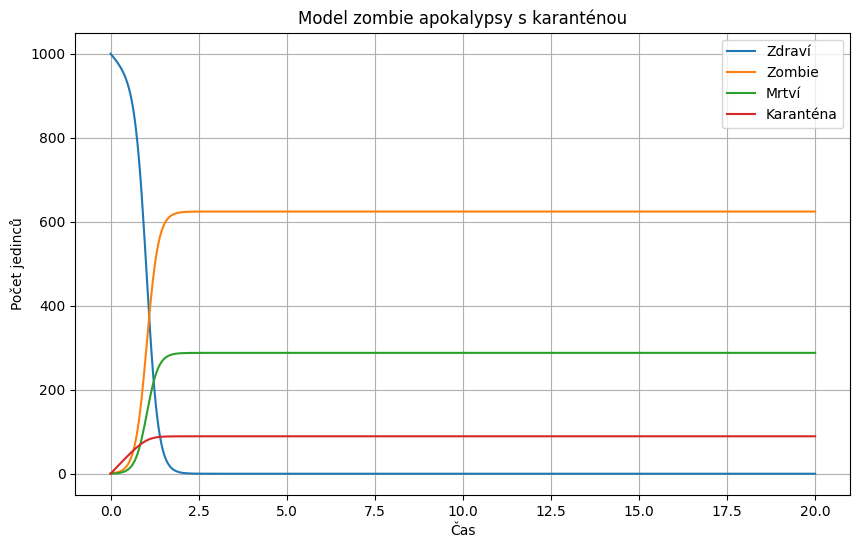

In [20]:
def zombie_model_with_quarantine(y, t, beta, delta, alpha, gamma):
    S, Z, R, Q = y
    dSdt = -beta * S * Z - gamma * S
    dZdt = beta * S * Z - delta * S * Z
    dRdt = delta * S * Z + alpha * S
    dQdt = gamma * S
    return [dSdt, dZdt, dRdt, dQdt]


# Počáteční podmínky
S0 = 1000
Z0 = 1
R0 = 0
Q0 = 0
y0 = [S0, Z0, R0, Q0]

# Parametr karantény
gamma = 0.09  # míra, s jakou lidé přecházejí do karantény

# Integrace
solution = odeint(zombie_model_with_quarantine, y0, t, args=(beta, delta, alpha, gamma))
S, Z, R, Q = solution.T

# Graf
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Zdraví")
plt.plot(t, Z, label="Zombie")
plt.plot(t, R, label="Mrtví")
plt.plot(t, Q, label="Karanténa")
plt.xlabel("Čas")
plt.ylabel("Počet jedinců")
plt.title("Model zombie apokalypsy s karanténou")
plt.legend()
plt.grid()
plt.show()


### Odpověď:

- Karanténa snižuje počet zdravých, kteří se mohou nakazit.
- Zpomaluje nástup epidemie, zvláště pokud je γ dostatečně velké.
- Lze zachránit více zdravých lidí → důležitý mechanismus pro řízení krize.
- Fázová změna: při γ > 2 může zombie populace zcela zaniknout.
